In [1]:
import numpy as np
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [2]:
#x = np.concatenate([np.ones([10,1])*np.array([1,0,0]),np.ones([10,1])*np.array([0,1,0]),np.ones([10,1])*np.array([0,0,1]),np.ones([10,1])*np.array([1,0,1])], axis=0)
#y = np.array([['a']*10+['c']*10+['b']*10+['d']*10]).reshape([40,1])

In [3]:
x = np.concatenate([np.ones([10,1])*np.array([1,0,0]),np.ones([10,1])*np.array([0,1,0]),np.ones([10,1])*np.array([0,0,1])], axis=0)
y = np.array([['a']*10+['c']*10+['b']*10]).reshape([30,1])

In [4]:
model = xgb.XGBClassifier(n_estimators=2, objective='mlogloss').fit(x, y)
model._Booster.dump_model('trees.txt')

/Users/liouscott/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/liouscott/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


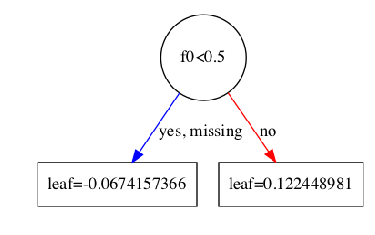

In [5]:
plot_tree(model, num_trees=0)
plt.show()

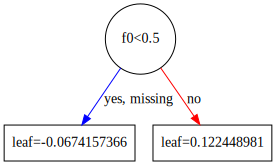

In [6]:
xgb.to_graphviz(model)

booster[0]:
0:[f0<0.5] yes=1,no=2,missing=1
	1:leaf=-0.0674157
	2:leaf=0.122449
booster[1]:
0:[f2<0.5] yes=1,no=2,missing=1
	1:leaf=-0.0674157
	2:leaf=0.122449
booster[2]:
0:[f1<0.5] yes=1,no=2,missing=1
	1:leaf=-0.0674157
	2:leaf=0.122449
booster[3]:
0:[f0<0.5] yes=1,no=2,missing=1
	1:leaf=-0.0650523
	2:leaf=0.10941
booster[4]:
0:[f2<0.5] yes=1,no=2,missing=1
	1:leaf=-0.0650523
	2:leaf=0.10941
booster[5]:
0:[f1<0.5] yes=1,no=2,missing=1
	1:leaf=-0.0650523
	2:leaf=0.10941

In [7]:
print(model.predict_proba(np.array([[1,0,0]])))

[[0.41852772 0.29073614 0.29073614]]


In [8]:
print(np.exp(+0.122449+0.10941)/(np.exp(+0.122449+0.10941)+np.exp(-0.0674157-0.0650523)+np.exp(-0.0674157-0.0650523)))
print(np.exp(-0.0674157-0.0650523)/(np.exp(+0.122449+0.10941)+np.exp(-0.0674157-0.0650523)+np.exp(-0.0674157-0.0650523)))
print(np.exp(-0.0674157-0.0650523)/(np.exp(+0.122449+0.10941)+np.exp(-0.0674157-0.0650523)+np.exp(-0.0674157-0.0650523)))

0.4185277190625621
0.29073614046871893
0.29073614046871893
